In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import numpy as np
from numpy import linalg as la
import pandas as pd
import sklearn

# Part 1: Logistic Regression

Write a function `logistic` that fits a logistic regression model using **gradient descent** and takes the following two arguments as input:

1. `X`: A numpy array of the shape `(N,d)` where `N` is the number of data points, and `d` is the data dimension. Do not assume anything about `N` or `d` other than being a positive integer. `X` is the input data features in the training set.
2. `Y`: A numpy array of the shape `(N,1)`, the labels set corresponding to `X`. Each label is either -1 or +1.


and returns the logistic regression weight vector defining the decision boundary:
$$\theta=\begin{bmatrix} \theta_0\\ \theta_1\\ \cdots \\ \theta_d \end{bmatrix}$$
which is a numpy array with a shape of `(d+1,1)`. Your function should:

1. **Have an Intercept Weight** (Same as before): In other words, your fitting model should be minimizing the following logistic loss 
\begin{align}
\mathcal{J}(\theta; X, Y) &= \frac{1}{N}\sum_{i=1}^N \ln(1+\exp(-y_i \pmb{\theta}^T \pmb{x_i}))
\end{align}
An easy way to do this is by concatenating a constant 1-column to the data matrix (this has already been done for you).

2. **Calculate Gradients**: In gradient descent, we try to approach the global minimum by moving the parameters opposite to the direction of its gradient step by step. So, to implement gradient descent, we first need to know the gradient of the loss with respect to $\theta$, which we computed in the lectures to be:
$$
\nabla_\theta \mathcal{J}(\theta; X, Y) = \frac{1}{N} \sum_{i=1}^N \frac{-y_i \pmb{x_i}}{1+\exp(y_i\pmb{\theta}^T \pmb{x_i})}
$$
In gradient descent, we start with an initial value for the vector $\theta$ and for a fixed number of iterations, update $\theta$ as follows:
$$
\theta \leftarrow \theta - \alpha \frac{1}{N} \sum_{i=1}^N \frac{-y_i \pmb{x_i}}{1+\exp(y_i\pmb{\theta}^T \pmb{x_i})}.
$$
$\alpha$ above is the *learning rate*.

**Note**: You should not modify the learning_rate(`lrate`) or iterations(`num_iter`) as that will change the results your code produces from the one the autograder expects.

In [2]:
#grade

def logistic(X, Y, lrate=.01, num_iter=1000):
    '''
    Arguments:
        X (n x d FloatTensor): the feature matrix
        Y (n x 1 FloatTensor): the labels

    Returns:
        (d + 1) x 1 FloatTensor: the parameters theta
    '''
    
    n, d = X.shape
    X = np.concatenate((np.ones((n, 1)), X), 1)
    theta = np.zeros((d+1, 1))
    theta = theta.flatten()


    for i in range(num_iter):
        ### WRITE YOUR CODE HERE
        
        s = np.zeros(X.shape[1])
        
        for j in range(n):
            
            denominator = 1 + np.exp(Y[j] * np.inner(theta, X[j,:]) )
            
            numerator = -Y[j] * X[j,:]
            
            s += numerator / denominator[0]
            
        theta = theta - lrate/n * s
        ### END STUDENT CODE
        
    return theta.reshape((d+1, 1))

The code below will generate the dataset for logistic regression. It is guaranteed to be linearly seperable.

In [3]:
def load_logistic_data():
    np.random.seed(1)
    w = np.array([-1., 2.])
    margin=1.5
    size=200
    bounds=[-5., 5.]
    trans=0.0
    in_margin = lambda x: np.abs(w.flatten().dot(x.flatten())) / la.norm(w) < margin
    half_margin = lambda x: 0.6*margin < w.flatten().dot(x.flatten()) / la.norm(w) < 0.65*margin
    X = []
    Y = []
    for i in range(size):
        x = np.random.uniform(bounds[0], bounds[1], 2) + trans
        while in_margin(x):
            x = np.random.uniform(bounds[0], bounds[1], 2) + trans
        if w.flatten().dot(x.flatten()) + trans > 0:
            Y.append(1.)
        else:
            Y.append(-1.)
        X.append(x)
    for j in range(1):
        x_out = np.random.uniform(bounds[0], bounds[1], 2) + trans
        while not half_margin(x_out):
              x_out = np.random.uniform(bounds[0], bounds[1], 2) + trans
        X.append(x_out)
        Y.append(-1.)
    X = np.stack(X)
    Y = np.stack(Y).reshape(-1, 1)

    return X, Y

In [4]:
#SAMPLE TEST CASE
X, Y = load_logistic_data()
theta = logistic(X, Y)
print(theta)
assert np.array_equal(theta.round(3), np.array([[-0.037],
                                                [-0.547],
                                                [ 1.398]]))


[[-0.03716203]
 [-0.54661557]
 [ 1.39766331]]


In a previous week's lab, we looked at gradient descent for linear regression. The code below defines a function for computing the decision boundary computed by the ordinary least squares model, to compare with the decision boundary computed by the logistic regression model you just implemented.

In [5]:
def linear_gd(X, Y, lrate=0.01, num_iter=1000):
    '''
    Arguments:
        X (n x d numpy array): the feature matrix
         Y (n x 1 numpy array): the labels
        num_iter (int): iterations of gradient descent to perform

    Returns:
        (d + 1) x 1 numpy array: the parameters w
    '''
    n, d = X.shape
    X = np.concatenate((np.ones((n, 1)), X), 1)
    theta = np.zeros((d+1, 1))
    for i in range(num_iter):
        theta = theta - (lrate/n) * X.T @ (X @ theta - Y)
    return theta

Run the code below to plot the two different decision boundaries on the dataset. The two colors represent class labels. This may take a few minutes to complete.

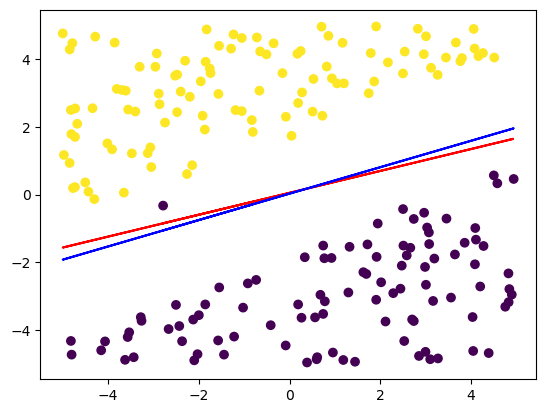

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [6]:
def logistic_vs_ols():
    '''
    Returns:
        Figure: the figure plotted with matplotlib
    '''
    X, Y = load_logistic_data()
    n, d = X.shape
    theta_log = logistic(X, Y, lrate=.01, num_iter=1000)
    theta_linear = linear_gd(X, Y)
    plt.scatter(X[:,0], X[:,1], c = Y[:,0])
    X_ = np.concatenate((np.ones((n, 1)), X), 1)
    plt.plot(X[:,:d-1], -(X_[:,:d]@theta_linear[:d])/theta_linear[d], color='red')
    plt.plot(X[:,:d-1], -(X_[:,:d]@theta_log[:d])/theta_log[d], color='blue')
    plt.show()
    return plt.gcf()
    
logistic_vs_ols()

Which model appears to classify the data better? Can you explain your reasoning? If you had access to more data, how might that change your conclusion? What causes this difference in boundaries, and what can you say about the set of optimal solutions for each model? 

# Part 2: Softmax Regression

For this part of the lab, we will use a similar dataset as we used for last week's Perceptron lab: the MNIST dataset, which comprises of handwritten digits 0-9. We will only use a subset of the training set, which is 19999 digits represented as 28x28 images that we use as a flattened feature vector of length 28*28=784. In the csv file we will use, the first column of the csv is the labels vector.

In [7]:
train = pd.concat(map(pd.read_csv, ["train_1.csv","train_2.csv","train_3.csv","train_4.csv"]), ignore_index=True)
print(train.shape)

traindata = np.array(train)[:,1:]
trainlabels = np.array(train)[:,0]

(19999, 785)


In [8]:
print(trainlabels[:10])

[5 7 9 5 2 0 6 5 5 2]


As discussed in lecture, for Softmax Regression we want to put each label as a "one-hot" binary vector of length $k-1$, where $k$ is the number of classes. For a specific label $y = i$, if $i \neq k-1$ (with 0-indexing), the corresponding one-hot vector will have 1 at index $i$ and 0s everywhere else. In the case the label $i = k-1$, the correspoding vector will be all 0s. Define the function below that takes as input a labels array $Y$ with $k$ classes and returns the one-hot encoding, a 2d array of size $($len$(Y), k-1)$ with each row being the one-hot encoding of each label. 

In [9]:
#grade

def one_hot(Y, k):
    
    # Y --> label/ground truth.
    # k --> Number of classes.
    # return one-hot encoding of Y
    
    ### WRITE YOUR CODE HERE
    encoding = np.zeros((len(Y), k - 1))
    
    for idx, label in enumerate(Y):
        
        if label < k - 1:
            
            encoding[idx][label] = 1 
        
        
    return encoding
    
    
    ### END STUDENT CODE

In [10]:
# SAMPLE TEST
Y = [0, 3, 1, 2, 1, 4, 4, 3, 0]
k = 5
assert np.array_equal(one_hot(Y, k), np.array([[1., 0., 0., 0.],
                                              [0., 0., 0., 1.],
                                              [0., 1., 0., 0.],
                                              [0., 0., 1., 0.],
                                              [0., 1., 0., 0.],
                                              [0., 0., 0., 0.],
                                              [0., 0., 0., 0.],
                                              [0., 0., 0., 1.],
                                              [1., 0., 0., 0.]]))

**Implementing Softmax Regression**

Recall that the softmax regression model can be viewed as a generalized logistic regression model for multiple classes. 

Let $\Theta$ be a $(d+1)×(k−1)$ dimensional vector where the $j$th column is the parameters for output $j$. 

Generally, for input $x$, let $a_j(x)$ be the output for the $j \in \{1,2,\ldots k-1\}$; the output is $a_j(x) = \frac{e^{\theta_j^Tx}}{1+ \sum_{i=1}^{k-1} e^{\theta_i^Tx}}$.

For our task below, $\theta_j^Tx$ can become very large, and when we exponentiate this linear term $(e^{\theta_j^Tx})$, we get numerical stability issues as exponentiation overflows. To avoid this problem, we must reduce the magnitude of the linear term in a consistent way that does not effect the final class output. Here, we will subtract $\max\{\theta_j^Tx\}$ from each value of $\theta_j^Tx$. So $a_j(x) = \frac{e^{\theta_j^Tx - \max\{\theta_j^Tx\}}}{1+ \sum_{i=1}^{k-1} e^{{\theta_i^Tx} - \max\{\theta_j^Tx\}}}$. Notice the denominator is the same for each row --- the sum of the numerators in each row + 1.

Let $A$ be the $n \times (k-1)$ dimensional matrix where the $i$th row is the vector $(a_1(x^{(i)}), a_2(x^{(i)}), \ldots a_{k-1}(x^{(i)}))$, i.e., the output produced by the $a_j$s on the $i$th row of $X$. In other words, the $ij$th entry of $A$ is $a_j(x^{(i)})$.

For SGD, suppose we want to update the parameters with respect to example $(x,y)$, where $x$ is a column vector of size $(d+1)$, and $y$ is a vector of size $k-1$. Consider the (row) vector $a-y$, where the $i$th entry is $a_i(x) - y_i$, where $a_i$ defined as above and $y_i$ is the $i$th entry of $y$. The the update rule in SGD (w.r.t. example $(x,y)$) is $\Theta = \Theta - \alpha x (a - y)$. Remember $x$ is $(d+1) \times 1$, and $(a-y)$ is $1 \times (k-1)$, and so dimension of $\Theta$ = dimension of $x(a-y)$ is $(d+1) \times (k-1)$. 

In [28]:
#grade

def softmax(X, y_hot, lr, num_epochs):
    
    # X --> Input
    # y_hot --> one-hot encoding of labels
    # lr --> learning rate
    # num_epochs --> Number of iterations
    
        
    # n -> number of training examples
    # d -> number of features 
    n, d = X.shape
    k = y_hot.shape[1]+1
    X = np.concatenate((np.ones((n, 1)), X), 1)
    ind = list(range(n))
    # Initializing weights
    theta = np.zeros((d+1, k-1))
    
    # shuffle the indices of the training set before SGD
    ind = list(range(n))
    np.random.seed(1234)
    np.random.shuffle(ind)
    
    # Training loop
    for epoch in range(num_epochs):

        # Create matrix A
        # subtracting max as explained above to ensure numerical stability

        A = X@theta
        # using a for loop to make it understandable. can be rewritten using broadcast for optimization
        for i in range(len(A)): 
            A[i] = np.exp(A[i] - np.max(A[i]))
            A[i] /= (1+np.sum(A[i]))

        #SGD
        for j in ind:
            x_j, y_j, a_j = X[j].reshape((-1, 1)), y_hot[j].reshape((1, -1)), A[j].reshape((1, -1))
            
            
            ### WRITE YOUR CODE HERE
            
            theta = theta - lr*x_j@(a_j - y_j)
            ### END STUDENT CODE
            
    return theta

In [29]:
# SAMPLE TEST

np.random.seed(0)
X = np.random.randint(255, size=(9, 4))/255
k = 5
Y = one_hot([0, 3, 1, 2, 1, 4, 4, 3, 0], k)

assert np.array_equal(softmax(X, Y, lr=0.1, num_epochs=50).round(3), 
                      np.array([[-0.063,  0.829,  0.84 ,  1.491],
                                [ 1.069, -1.019, -0.885, -0.319],
                                [ 0.324,  2.119, -0.137,  1.917],
                                [ 2.15 , -1.514, -0.181,  0.123],
                                [ 1.328,  2.077,  1.522, -0.177]]))

0.8
0.7816853538642046
0.7690484850637387
0.7597796209686458
0.7525843877562854
0.7466989483938223
0.7416678010338078
0.7372153739512748
0.7331715967830439
0.7294293568811736
0.7259195536684488
0.7225963585644823
0.7194246578012111
0.7163815572564196
0.7134522712478817
0.7106254829529611
0.7078922590359589
0.7052453494722205
0.7026787258758249
0.7001872700430916
0.6977665588676498
0.6954127123099662
0.6931222834783508
0.6908921774312518
0.6887195899835166
0.6866019607331968
0.6845369363968374
0.6825223417550795
0.6805561563117776
0.6786364953085499
0.6767615941054866
0.6749297951958618
0.6731377095262445
0.6713822559893087
0.6696628787670523
0.6679788474920804
0.6663293303692893
0.6647134415294862
0.6631302716750285
0.66157890783918
0.6600584460206881
0.6585679991373887
0.6571067018951995
0.655673713620828
0.6542682197501221
0.6528894324309326
0.6515365905461168
0.6502089593610045
0.648905829932322
0.6476265183706102


Now, let's compare the performance of this multi-class softmax classifer with the binary perceptron classifiers we built last week. Recall the functions below, that create binary labels and define our `perceptron` algorithm.

In [ ]:
def createLabels(L,k):
    # L is (N,) np array that stores the labels for multi-class classification
    
    Y = np.zeros(L.shape)
    for i in range(len(L)):
        Y[i] = 1.0 if L[i] == k else -1.0
    
    return Y

In [ ]:
def perceptron(X, Y, num_epochs):
    assert X.ndim==2
    N = X.shape[0]
    d = X.shape[1]
    assert Y.size == N
    
    X_constant = np.concatenate([np.ones((N,1)), X], axis=1) # concatenate a column of 1's
    theta = np.zeros(X_constant.shape[1])
    for epoch in range(num_epochs):
        
        for i, x in enumerate(X_constant):
            guess = np.dot(x,theta) #take the dot product of the weight and the data
            guess = 1. if guess > 0 else -1.
            
            if guess != Y[i]:
                theta = theta + Y[i]*x # update theta

    return theta

Now, let's get the perceptron guesses. Remember, we only care about the sign of the dot products. Since we really have 10 perceptron binary classifiers, $i = 1$ for index $i$ in the output array means that the perceptron classifier for digit $i$ guessed "true"; the perceptron for digit $i$ thinks that we do indeed have digit $i$.

In [ ]:
def get_perceptron_thetas(num_epochs):
    perceptron_thetas = np.zeros((10, 785))
    for n in range(10):
        Y = createLabels(trainlabels,n)
        theta = perceptron(traindata, Y, num_epochs)
        perceptron_thetas[n] = theta
    return perceptron_thetas

num_epochs = 15
perceptron_thetas = get_perceptron_thetas(num_epochs)

X_constant = np.concatenate([np.ones((len(traindata),1)), traindata], axis=1)
#the guess of each perceptron classifier
perceptron_guesses = np.where(X_constant@perceptron_thetas.T > 0, 1., -1.)

Run the code below to get the guesses of the softmax classifier. Remember, to get the prediction softmax exponentiates the linear term and divides each term by the row sum so we have probabilities. Each $\theta$ vector has length $k-1$. Since we are working with probabilities, the total sum must be equal to 1, which uniquely determines the $k$th value. 

In [ ]:
def predict(X, theta):
    
    # X --> Input
    # theta --> weights
    X = np.concatenate((np.ones((len(X), 1)), X), 1)

    # Predicting
    # the linear term
    z = X@theta
    for i in range(len(X)):
      # subtract the max for numerical stability (otherwise exp overflows)
      z[i] = np.exp(z[i] - np.max(z[i]))
      # divide each entry by its row sum + 1
      z[i] /= (1+np.sum(z[i]))
    #the final weight is determined by the values we have calculated; the sum of each row must equal 1
    guesses = np.append(z, (1-np.sum(z, axis = 1)).reshape(-1, 1), axis = 1)
    
    # Returning the class with highest probability.
    return np.argmax(guesses, axis=1)


# input data
X = traindata/255
k = 10
Y = one_hot(trainlabels, k)

#softmax guesses
softmax_theta = softmax(X, Y, lr=0.1, num_epochs=100)
softmax_guesses = predict(X, softmax_theta)


Let's visualize some data points, that the perceptron classifiers misbehaves on. What do you observe about the outputs for each approach? What causes this difference? Do you have any intuition on the performance of each model? In what case can we guaranteed the performance of the 10 perceptron binary classifiers to be the same as the softmax 10-class classifier?

In [ ]:
plt.imshow(traindata[33].reshape((28, 28)), cmap=plt.get_cmap('gray'))
plt.show()

In [ ]:
print("the perceptron classifers guessed: {0}".format(np.where(perceptron_guesses[33] == 1.)[0]))
print("the softmax classifer guessed: {0}".format(softmax_guesses[33]))
print("the true label of this digit is: {0}".format(trainlabels[33]))

In the following two examples, our softmax classifier mispredicts as well. Why might the model have been confused here? What does the perceptron classifiers results tell you? What possible benefits are there for having multiple binary perceptron classifers, one for each digit?

In [ ]:
plt.imshow(traindata[2].reshape((28, 28)), cmap=plt.get_cmap('gray'))
plt.show()

In [ ]:
print("the perceptron classifers guessed: {0}".format(np.where(perceptron_guesses[2] == 1.)[0]))
print("the softmax classifer guessed: {0}".format(softmax_guesses[2]))
print("the true label of this digit is: {0}".format(trainlabels[2]))

In [ ]:
plt.imshow(traindata[1].reshape((28, 28)), cmap=plt.get_cmap('gray'))
plt.show()

In [ ]:
print("the perceptron classifers guessed: {0}".format(np.where(perceptron_guesses[1] == 1.)[0]))
print("the softmax classifer guessed: {0}".format(softmax_guesses[1]))
print("the true label of this digit is: {0}".format(trainlabels[1]))